In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline  

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
data = pd.read_csv('spam.csv' , encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.drop(['Unnamed: 2' , 'Unnamed: 3', 'Unnamed: 4'] , axis = 1 , inplace = True )
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.rename(columns = {'v1' : 'labels' , 'v2' : 'message'}, inplace = True)
data.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data['label'] = data['labels'].map({'ham' : 0 , 'spam' : 1})
data.drop(['labels'], axis = 1 , inplace = True)
data.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
total_message_size = data.count()['message']
print("Total message count : " , total_message_size)
data['label'].value_counts()

Total message count :  5572


0    4825
1     747
Name: label, dtype: int64

In [7]:
# splitting data into train and test set ...

totalMails = total_message_size
trainIndex, testIndex = list(), list()
for i in range(data.shape[0]):
    if np.random.uniform(0, 1) < 0.75:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = data.loc[trainIndex]
testData = data.loc[testIndex]

In [8]:
trainData.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
trainData['label'].value_counts()

0    3691
1     558
Name: label, dtype: int64

In [10]:
testData.head()

,message,label
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
18,Fine if thatåÕs the way u feel. ThatåÕs the wa...,0
22,So Ì_ pay first lar... Then when is da stock c...,0
27,Did you catch the bus ? Are you frying an egg ...,0


In [11]:
testData['label'].value_counts()

0    1134
1     189
Name: label, dtype: int64

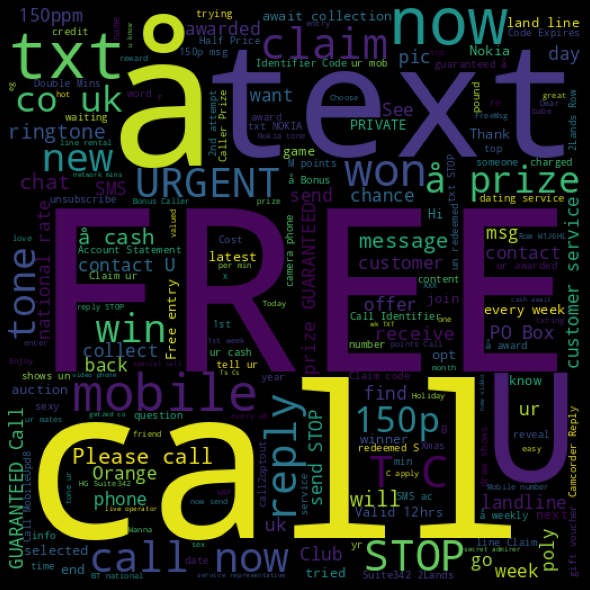

In [12]:
spam_words = ' '.join(list(data[data['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [13]:
# pre processing the data 
# generates tokens from text data 

def process_message(message , lower_case = True , stem = False, lemm = True  , stop_word = True , n_gram = 1) : 
    # 1) convert all to lower , as FREE and free are same and occur in spam 
    # 2) tokenize message into tokens 
    # 3) stop words
    # 4) stemming or lemmatization 

    if lower_case : 
        message =  message.lower()

    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    n_gram_words = []
    if n_gram > 1 : 
        for i in range(len(words)- n_gram + 1):
            temp_word = ' '.join(words[i : i + n_gram])
            n_gram_words.append(temp_word)
        # print(n_gram_words)
        words = n_gram_words
    if stop_word : 
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem : 
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    
    if lemm : 
        lemmer =  WordNetLemmatizer()
        words = [lemmer.lemmatize(word) for word in  words]
    return words


# pre_process("" , n_gram = 2)



In [40]:
import math 
class SpamClassifier(object):
    def __init__(self ): 
        pass 
    
    def fit(self , x_train , y_train ) : 
        self.prepare_data(x_train , y_train)

    def predict(self , x_test: list) -> list : 
        y_predicted = [] 
        for msg in x_test : 
            y_predicted.append(self.classify(msg))
        
        return y_predicted 
    
    def prepare_data(self , x_train , y_train):
        self.spam_dict = {} 
        self.ham_dict  = {}
        self.spam_count , self.ham_count = 0  , 0 
        self.spam_prob , self.ham_prob = 0 , 0

        length = len(x_train)
        for i in range(length) :
            tokens = process_message(x_train[i])   # tokens -> list 
            for token in tokens : 
                if y_train[i] == 1 : 
                    self.spam_count += 1
                    if token in self.spam_dict : self.spam_dict[token] += 1
                    else : self.spam_dict[token] = 1 
                else : 
                    self.ham_count += 1 
                    if token in self.ham_dict : self.ham_dict[token] += 1 
                    else : self.ham_dict[token] = 1 

        for key in self.spam_dict : 
            self.spam_dict[key] = self.spam_dict[key]/self.spam_count
        
        for key in self.ham_dict : 
            self.ham_dict[key] = self.ham_dict[key]/self.ham_count 

        self.spam_prob = self.spam_count / (self.spam_count + self.ham_count)
        self.ham_prob  = self.ham_count / (self.spam_count + self.ham_count)

    def classify(self , msg) : 
        tokens = process_message(msg) 
        spam_prob_of_msg = 0 
        ham_prob_of_msg = 0 

        for token in tokens : 
            if token in self.spam_dict : 
                spam_prob_of_msg += math.log(self.spam_dict[token])
            
            if token in self.ham_dict : 
                ham_prob_of_msg += math.log(self.ham_dict[token])
        
        # print(spam_prob_of_msg , " " , ham_prob_of_msg)
        return 1 if (abs(spam_prob_of_msg + math.log(self.spam_prob))) > abs(ham_prob_of_msg + math.log(self.ham_prob)) else 0 
        

In [31]:

def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)

    # print(true_pos , true_neg , false_pos , false_neg)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)




In [41]:
model = SpamClassifier()
model.fit(list(trainData['message']) , list(trainData['label']))
output = model.predict(testData['message'])
print(output)
print(list(testData['label']))
metrics(list(testData['label']) , output)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 